# Walmart Sales Data: Predictive Analysis using Linear Regression

This notebook builds a simple machine learning model to predict profit margin using Walmart sales data. We'll use linear regression and basic data preprocessing techniques.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Project wallmart\walmart_data\Walmart.csv")
df.head()


,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,Total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


In [7]:
df_clean = df.dropna()
df_clean['unit_price'] = df_clean['unit_price'].replace('[\$,]', '', regex=True).astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_22368\4190999108.py:2: SyntaxWarning: invalid escape sequence '\$'
  df_clean['unit_price'] = df_clean['unit_price'].replace('[\$,]', '', regex=True).astype(float)


In [8]:
X = df_clean[['unit_price', 'quantity', 'rating', 'City', 'category', 'payment_method']]
y = df_clean['profit_margin']


In [9]:
categorical_cols = ['City', 'category', 'payment_method']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['City', 'category',
                                                   'payment_method'])])),
                ('regressor', LinearRegression())])

In [11]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.9506557153020413
MSE: 0.0004147820788721905


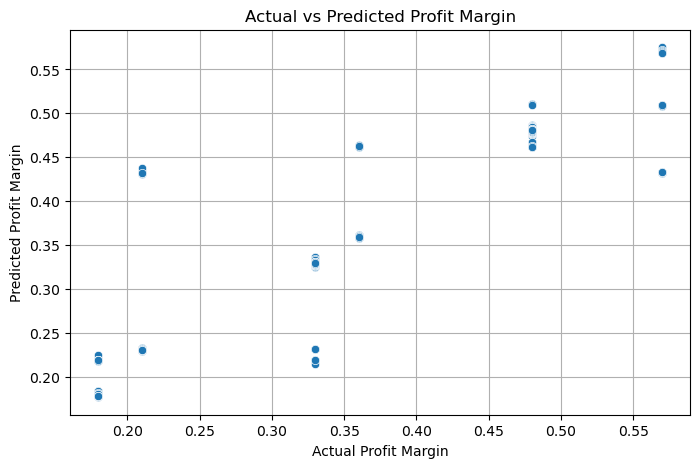

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Profit Margin")
plt.ylabel("Predicted Profit Margin")
plt.title("Actual vs Predicted Profit Margin")
plt.grid(True)
plt.show()
